# Introduction 

Dans le cadre de notre projet de NLP(Natural Language Processing) nous allons analyser un ensembles de textes qui tournent autour de la violence faite aux femmes. nous allons proceder a une analyse basée principalement sur la biblotheque nltk et spacy. 
L'object principal de ce projet est de deteceter l'idée generale de chaque texte ainsi que la realisation d'une conclusion
generale liant les differents articles eduidiés.

# 1) Importations de textes :

In [104]:
import pandas as pd
import numpy as np
import nltk, re, pprint
from urllib.request import urlopen
import urllib.request
import warnings # on importe un package de warnings.C’est ce qui servira à ignorer les message d'avertissement
warnings.filterwarnings('ignore')

In [13]:
#loading un texte via le site web  : www.un.org

import urllib.request

siteurl = "https://www.un.org/fr/observances/ending-violence-against-women"

req = urllib.request.Request(siteurl, headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.100 Safari/537.36'})
pageHTML = urllib.request.urlopen(req).read().decode('utf-8')
from nltk import word_tokenize
from bs4 import BeautifulSoup
end_violence = BeautifulSoup(pageHTML, 'html.parser').get_text()
#tokens = word_tokenize(raw)
#tokens

In [5]:
#Une conversion local sur mon ordianteur des textes qui sont aux formats PDF et Doc en txt. 
#Importation des textes sous la format txt.

#REMARQUE : pour le texte "Essor", j'ai supprimé au prealable la biblographie manuellement apres la conversion de texte.

viol_femme = open("Violences-faites-aux-femmes.txt", "r", encoding='utf-8')
tx_suis = open("Suis-je-concernees.txt", "r", encoding='utf-8-sig')
tx_SEVE = open("SEVE_044_0093.txt", "r", encoding='utf-8')
tx_Essor = open("Essor.txt", "r", encoding='utf-8')
tx_fem_solid = open("La-Fe╠üde╠üration-nationale-Solidarite╠ü-Femmes-a-analyse╠ü-les-donne╠ües-du-3919.txt", "r", encoding='latin-1')
tx_protec = open("Les-mesures-de-protection-pouvant-e╠étre-prises-par-le-juge-civil.txt", "r", encoding='latin-1')

#Une nettoyage préalable de textes via la fonction strip qui permet de supprimer les espaces à droite et à gauché : 

tx_suis = tx_suis.read().strip()
viol_femme = viol_femme.read().strip()
tx_SEVE = tx_SEVE.read().strip()
tx_Essor = tx_Essor.read().strip()
tx_fem_solid=tx_fem_solid.read()
tx_protec = tx_protec.read().strip()

# 2) Nettoyage et traitement de textes

In [6]:
#Importation de packages necessaires 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.collocations import *
import spacy
from spacy.language import Language
import re
#!python -m pip install --user gensim stop-words WordCloud
from wordcloud import WordCloud
from nltk import FreqDist

#!pip install rake_nltk
from rake_nltk import Rake
import matplotlib.pyplot as plt
!pip install yake
# python snippet for yake
from yake import KeywordExtractor as Yake

# Telechargement de stop words de la langue francaise :
#stopwords

try:
    stopwords = set(stopwords.words('french'))
    
except LookupError:
    
    nltk.download('stopwords')
    stopwords = set(stopwords.words('french'))
    



In [105]:
#Telechargement package spacy
#Importer le modèle de reconnaissance de langage
#Pour pouvoir utiliser les modèles pré-entraînés de spaCy, il faut les télécharger
import tempfile
import os
import spacy

temp_dir = tempfile.NamedTemporaryFile()
temp_dir = temp_dir.name

os.system("wget -O {} https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin".format( "%s.model.bin" % temp_dir))
spacy.cli.download('fr_core_news_sm')

SystemExit: 1

In [106]:
spacy.load('fr_core_news_sm')

In [7]:
#une fonction de prépocessing de texte tout en effectuant les étapes suivantes : 

#1) supprission de caracteres speciaux 
#2) mettre les mots en minuscule

def text_process(text):
    
    # Retirons les caractères spéciaux :
    text = re.sub(r'<.*?>', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\-", "", text)
    # mettre les mots en minuscule
    text = text.lower()
    
    return text

In [8]:
#Créer une fonction de nettoyage des textes effectuant les étapes suivantes : 

#1) la tokenization de text en une liste de mots
#2) Suppression de ponctutation
#3) Suprresion de stopwords

def Tokenization_clean(text) :  
    
    mots = word_tokenize(text,language="french",preserve_line=True)
    #Mise en place d'une liste vide qui va contenir les motes hors ponctutation : 
    mots_v1 = []
    #suppression de ponctutation : 
    
    for m in mots:
        if m.isalpha():
            mots_v1.append(m)
            
    #Mise en place d'une liste vide qui va contenir les motes clean : 
    
    mots_clean = []
            
    #suprresion de stopwords :
   
    for m1 in mots_v1:
        if m1 not in stopwords:
            mots_clean.append(m1)
    
    
    return mots_clean

In [82]:
#La lemmatisation :
#La lemmatisation d’une forme d’un mot consiste à ne sélectionner uniquement que sa forme canonique : 


# la commande "pip install spacy" : Pour installer spacy
# "python -m spacy download fr_core_web_sm":Pour installer le dictionnaire français sur spacy
#!python -m spacy download fr_core_web_sm
nlp = spacy.load('fr_core_news_sm')

def lemmatisation(token):
    
    doc = nlp(" ".join(token))
    dict_lemma =[] 
    for d in doc:
        dict_lemma.append(d.lemma_)#Mise en place d'une liste vide qui va contenir les mots apres lemmatisation.
    
    return dict_lemma

# 2-1 Analyse de texte 1 : ending-violence-against-women

In [170]:
#Etape 1 : Nettoyage et Tokenization : 

token1 = Tokenization_clean( text_process(end_violence))
end_violence_clean = " ".join(token1)
text1_clean = nltk.Text(token1)
#Determination de mots les plus frequentants dans notre texte 
fdist1=FreqDist(text1_clean)
vocabulary1=fdist1.keys()
fdist1


FreqDist({'femmes': 52, 'violence': 39, 'égard': 15, 'droits': 13, 'filles': 12, 'a': 9, 'tous': 8, 'plus': 8, 'journée': 7, 'internationale': 7, ...})

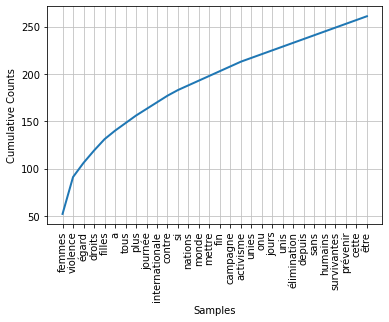

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [15]:
#La fréquence cumulée des 30 mots les plus fréquemment utilisés

fdist1.plot(30,cumulative=True)

In [16]:
#Dectection de mots les plus longs :
V = set(text1_clean)
long_words=[w for w in V if len(w) > 10]
sorted(long_words)

['amplification',
 'antiféministes',
 'aprèsconflit',
 'augmentation',
 'autonomiser',
 'caractéristiques',
 'commémoration',
 'connaissances',
 'connaissent',
 'constituent',
 'conséquences',
 'contextuels',
 'coordination',
 'cyberharcèlement',
 'célébrations',
 'difficultés',
 'décisionnaires',
 'déclaration',
 'défenseuses',
 'désavantages',
 'dévastatrices',
 'développement',
 'emblématiques',
 'exploitation',
 'facebooktwitteryoutubeflickrinstagram',
 'fondamentaux',
 'frauduleuxdroits',
 'féminicides',
 'harcèlement',
 'humanitaires',
 'interdisant',
 'internationale',
 'maltraitance',
 'mobilisation',
 'mutilations',
 'opportunités',
 'organisations',
 'parallèlement',
 'persistantes',
 'professionnels',
 'précédentes',
 'préférences',
 'psychologique',
 'psychologiques',
 'recrudescence',
 'renforcement',
 'représenter',
 'responsables',
 'réalisation',
 'rétrécissement',
 'scolarisation',
 'sensibilisation',
 'souffrances',
 'stigmatisation',
 'survivantes',
 'termineront',
 

In [32]:

#Les collocations sont deux ou plusieurs mots qui ont tendance à apparaître fréquemment ensembleensemble de deux mots qui
#si l'un est remplacé par l'autre, changent le sens de l'expression
text1_clean.collocations()
text1_clean.concordance('violence')
text1_clean.concordance('droit')
text1_clean.concordance('antiféministes')
text1_clean.concordance('harcèlement')
text1_clean.concordance('souffrances')  

égard femmes; violence égard; mettre fin; journée internationale;
femmes filles; nations unies; tous unis; fin violence; jours
activisme; violence femmes; avenir meilleur; basée genre; centre
connaissances; meilleur exempt; représenter avenir; toggle navigation;
défenseurs droits; élimination violence; mouvements féministes;
organisations défense
Displaying 25 of 39 matches:
journée internationale violence femmes nations unies skip to main 
 українська journée internationale violence novembre toggle navigation accueil
ations lors journée internationale violence femmes couleur orange utilisée rep
représenter avenir meilleur exempt violence femmes photo onu femmes comme lors
précédentes journée internationale violence femmes donne coup jours termineron
représenter avenir meilleur exempt violence femmes thème tous unis violence fe
pt violence femmes thème tous unis violence femmes filles a cinq ans mouvement
nce matière prévention élimination violence égard femmes depuis lors prise con
te

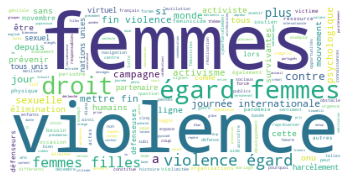

In [20]:
#Construction de nuage de pointe
# creaction d'une fonction permettant de etablir une nuage de mots : 

wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text = " ".join(token1) 
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [169]:
#Objectif: Extraire les meilleurs phrases des données textuelles
#représenter sémantiquement l'ensemble du texte (signification)
# il suit une approche non supervisée qui s'appuie sur des caractéristiques extraites du texte
#supposons que vous ayez déjà l'article dans la variable "text".
rake = Rake(stopwords=stopwords, max_length=2)
rake.extract_keywords_from_text(end_violence)
rake_keyphrases = rake.get_ranked_phrases_with_scores()[:10]
rake_keyphrases


[(4.0, 'êtres humains'),
 (4.0, 'être limitée'),
 (4.0, 'étude publiée'),
 (4.0, 'également souffert'),
 (4.0, '» participez'),
 (4.0, 'travailleurs sociaux'),
 (4.0, 'tels actes'),
 (4.0, 'stress psychologique'),
 (4.0, 'souffrances physiques'),
 (4.0, 'société civile')]

In [158]:
#Objectif: Extraire les meilleurs mots des données textuelles
yake = Yake(lan="fr", stopwords=stopwords)
yake_keyphrases = yake.extract_keywords(end_violence_clean)
yake_keyphrases

[('violence égard femmes', 2.3452568919535573e-06),
 ('égard femmes filles', 7.104777320905072e-06),
 ('élimination violence égard', 1.3133203808803789e-05),
 ('mettre fin violence', 1.83816851095741e-05),
 ('internationale violence femmes', 1.9728178256497943e-05),
 ('journée internationale violence', 1.9878366552191135e-05),
 ('fin violence égard', 2.150084790577037e-05),
 ('violence femmes filles', 2.650443293403329e-05),
 ('prévenir violence égard', 2.7141483193330548e-05),
 ('violence contre femmes', 3.257880534391204e-05),
 ('égard femmes femmes', 3.759979243122739e-05),
 ('violence femmes comme', 4.0314525099309846e-05),
 ('contre femmes filles', 4.230789291968777e-05),
 ('exempt violence femmes', 4.252548448923455e-05),
 ('fin violence contre', 4.268014267130967e-05),
 ('femmes filles constitue', 5.716220812259949e-05),
 ('contre violence basée', 5.928997902494216e-05),
 ('éliminer violence égard', 5.970873711695839e-05),
 ('fin violence femmes', 6.124061023439216e-05),
 ('lutt

In [178]:
#Maintenant on va essayer d’attribuer une étiquette à chaque mot d’une phrase mentionnant la fonctionnalité 
#grammaticale d’un mot (Nom propre, adjectif, déterminant…)
import spacy

nlp = spacy.load("fr_core_news_sm")
doc = nlp(end_violence_clean)
token_tag = []
for token in doc:
    token_tag.append(token)
    print(token.text,token.tag_)
    

journée NOUN
internationale ADJ
violence NOUN
femmes ADJ
nations NOUN
unies ADJ
skip ADJ
to DET
main NOUN
content ADV
toggle NOUN
navigation NOUN
bienvenue VERB
nations NOUN
unies ADJ
العربية ADP
中文 ADP
english NOUN
français ADJ
português VERB
русский NOUN
español ADJ
kiswahili NOUN
türkçe VERB
українська ADJ
journée NOUN
internationale ADJ
violence NOUN
novembre ADJ
toggle VERB
navigation NOUN
accueil NOUN
contexte NOUN
messages NOUN
récits NOUN
ressources NOUN
vidéos NOUN
célébrations NOUN
lors ADV
journée NOUN
internationale ADJ
violence NOUN
femmes ADJ
couleur NOUN
orange VERB
utilisée VERB
représenter VERB
avenir NOUN
meilleur ADJ
exempt NOUN
violence NOUN
femmes ADJ
photo NOUN
onu ADJ
femmes NOUN
comme ADP
lors ADV
années NOUN
précédentes ADJ
journée NOUN
internationale ADJ
violence NOUN
femmes ADJ
donne VERB
coup NUM
jours NOUN
termineront VERB
décembre ADJ
jour NOUN
commémoration VERB
journée NOUN
internationale ADJ
droits VERB
plusieurs DET
événements NOUN
publics ADJ
cours NO

In [24]:
#Construire des ngrammes : 
from nltk.util import ngrams
from collections import Counter
#Trouvez des bigrammes et imprimez les 10 les plus courants
bigrams = ngrams(text1_clean,2)
print("Bigrammes les plus courants : ")
print(Counter(bigrams).most_common(10))

#Trouvez des trigrammes et imprimez les 10 les plus courants
trigrams = ngrams(text1_clean,3)
print(" \n Trigrammes les plus courants : " )
print(Counter(trigrams).most_common(10))

Bigrammes les plus courants : 
[(('égard', 'femmes'), 15), (('violence', 'égard'), 14), (('violence', 'femmes'), 13), (('femmes', 'filles'), 11), (('journée', 'internationale'), 6), (('mettre', 'fin'), 5), (('fin', 'violence'), 5), (('internationale', 'violence'), 4), (('nations', 'unies'), 4), (('tous', 'unis'), 4)]
 
 Trigrammes les plus courants : 
[(('violence', 'égard', 'femmes'), 14), (('égard', 'femmes', 'filles'), 6), (('mettre', 'fin', 'violence'), 5), (('journée', 'internationale', 'violence'), 4), (('élimination', 'violence', 'égard'), 4), (('internationale', 'violence', 'femmes'), 3), (('représenter', 'avenir', 'meilleur'), 2), (('avenir', 'meilleur', 'exempt'), 2), (('meilleur', 'exempt', 'violence'), 2), (('exempt', 'violence', 'femmes'), 2)]


In [25]:

fdist_ = nltk.FreqDist([w.lower() for w in text1_clean])
modals = ['peut', 'pourrait', 'pouvait', 'peut-être', 'doit', 'faut']
for m in modals:
    print(m+':',fdist_[m])

peut: 2
pourrait: 0
pouvait: 0
peut-être: 0
doit: 0
faut: 0


# Conclusion 1 :

Selon le resultat de notre traitement et analyse de texte, on a decidé de travailler princiaplement sur les mots suivants : et les conciderer comme des mots determinsites pour detecter le thematique clé du texte. Un text qui presente un combat entre les droits et la voilence sur les femmes. Son objectif principale est de chercher de solution pour mettre fin à la violence contre les femmes (mettre fin, fin violence, élimination violence...) et construire une avenir meilleure grace a des mouvements féministes contre les actes sexuels et mariages forcés, harcèlement, viol...
Ce texte a mis en evidence l'importance de la scolarisation de filles afin de lutter contre la violence(extrait :obstacle scolarisation universelle droit filles également responsables limitation de violence).


# 2-2 Analyse de texte 2 : Violences-faites-aux-femmes

In [171]:
#Etape 1 : Nettoyage et Tokenization : 

token2 = Tokenization_clean( text_process(viol_femme))
viol_femme_clean = " ".join(token2)
text2_clean = nltk.Text(token2)

#Determination de mots les plus frequentants dans notre texte 
fdist2=FreqDist(text2_clean)
vocabulary2=fdist2.keys()
fdist2



FreqDist({'violences': 11, 'femmes': 7, 'conjugales': 6, 'aide': 5, 'urgence': 5, 'victimes': 4, 'être': 4, 'article': 4, 'sans': 4, 'alors': 4, ...})

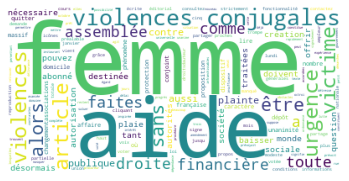

In [172]:
#Construction de nuage de pointe
# creaction d'une fonction permettant de etablir une nuage de mots : 

wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text = " ".join(token2) 
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [29]:
#Dectection de mots les plus longs :
V = set(text2_clean)
long_words=[w for w in V if len(w) > 10]
sorted(long_words)



['accompagnement',
 'application',
 'associations',
 'autorisation',
 'changements',
 'commissariat',
 'considérées',
 'constituent',
 'contraintes',
 'droitsdauteur',
 'fonctionnalité',
 'gouvernement',
 'hébergement',
 'informations',
 'infranchissables',
 'insuffisance',
 'mobilisations',
 'nécessaires',
 'parlementaire',
 'plaignantes',
 'politicienne',
 'possibilité',
 'proposition',
 'rassemblement',
 'reproduction',
 'réconfortante',
 'signalement',
 'strictement',
 'universelle']

In [47]:
#Les collocations sont deux ou plusieurs mots qui ont tendance à apparaître fréquemment ensembleensemble de deux mots qui
#si l'un est remplacé par l'autre, changent le sens de l'expression
text2_clean.collocations()
text2_clean.concordance('victimes')
text2_clean.concordance('conjugales')
text2_clean.concordance('gouvernement')
text2_clean.concordance('aide')
text2_clean.concordance('femmes')
text2_clean.concordance('urgence')





violences conjugales; autorités publiques; caractère massif; plaie
sociale; publiques doivent; question baisser; quitter domicile;
sociale toutes; société française; toutes autorités; violences faites;
comme plaie; lire aussi; traitées comme; création aide; urgence
destinée; aide financière; faites femmes; aide urgence; violences
contre
Displaying 4 of 4 matches:
n aide financière urgence destinée victimes vient être votée assemblée violenc
erselle urgence destinée permettre victimes mettre rapidement texte déjà voté 
les assemblée unanime aide urgence victimes cette aide urgence inspirée expéri
 selon ministère intérieur recense victimes violences conjugales nombre quasi 
Displaying 6 of 6 matches:
nt être votée assemblée violences conjugales désormais traitées comme plaie so
ublique sans lire aussi violences conjugales assemblée unanime aide urgence vi
sociations lutte contre violences conjugales constitue avancée saluer domaine 
érieur recense victimes violences conjugales nombre qu

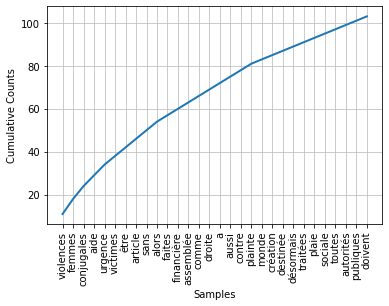

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [48]:

#La fréquence cumulée des 30 mots les plus fréquemment utilisés

fdist2.plot(30,cumulative=True)


In [175]:
#Objectif: Extraire les meilleurs phrases des données textuelles
#représenter sémantiquement l'ensemble du texte (signification)
# il suit une approche non supervisée qui s'appuie sur des caractéristiques extraites du texte
#supposons que vous ayez déjà l'article dans la variable "text".
rake = Rake(stopwords=stopwords, max_length=4)
rake.extract_keywords_from_text(text_process(viol_femme))
rake_keyphrases = rake.get_ranked_phrases_with_scores()[:20]
rake_keyphrases



[(16.0, 'autorités publiques doivent combattre'),
 (16.0, 'autorités publiques doivent combattre'),
 (16.0, 'abonnés comment mieux gérer'),
 (15.25, 'prêt sans intérêt permettant'),
 (14.5, 'recense 208 000 victimes'),
 (14.05, 'aide publique sans contrepartie'),
 (13.656862745098039, '’ autorisation contactez droitsdauteur'),
 (13.0, 'société française a cessé'),
 (12.799999999999999, '« aide financière universelle'),
 (12.656862745098039, 'pouvez offrir jusqu ’'),
 (12.490196078431373, '’ être considérées comme'),
 (11.95686274509804, '’ urgence » destinée'),
 (9.833333333333334, 'fonctionnalité « offrir'),
 (9.5, 'trois jours »'),
 (9.333333333333334, 'être traitées comme'),
 (9.25, 'rue sans ressources'),
 (9.0, 'texte déjà voté'),
 (9.0, 'nécessaire union éditorial'),
 (9.0, 'compagnon après avoir'),
 (8.833333333333334, 'désormais traitées comme')]

In [179]:
#Objectif: Extraire les meilleurs mots des données textuelles
yake = Yake(lan="fr", stopwords=stopwords)
yake_keyphrases = yake.extract_keywords(viol_femme_clean)
yake_keyphrases



[('comme plaie sociale', 0.00016742584803345747),
 ('plaie sociale toutes', 0.00016742584803345747),
 ('sociale toutes autorités', 0.00016742584803345747),
 ('toutes autorités publiques', 0.00018102517674119817),
 ('traitées comme plaie', 0.0001923593035732518),
 ('autorités publiques doivent', 0.0001923593035732518),
 ('création aide financière', 0.0002664406011957545),
 ('violences faites femmes', 0.00028995992486548276),
 ('violences conjugales dépôts', 0.00043289162370494823),
 ('conjugales dépôts plainte', 0.00043755534116214433),
 ('publiques doivent question', 0.0004420504420701315),
 ('publiques doivent lire', 0.0004420504420701315),
 ('propos violences faites', 0.00045018259719557536),
 ('violences faites voix', 0.00045018259719557536),
 ('paradigme violences faites', 0.00045018259719557536),
 ('aussi violences conjugales', 0.0004594882131215234),
 ('contre violences conjugales', 0.0004594882131215234),
 ('conjugales désormais traitées', 0.00046854713584362014),
 ('doivent que

In [177]:
#Maintenant on va essayer d’attribuer une étiquette à chaque mot d’une phrase mentionnant la fonctionnalité 
#grammaticale d’un mot (Nom propre, adjectif, déterminant…)
import spacy

nlp = spacy.load("fr_core_news_sm")
doc = nlp(viol_femme_clean)
token_tag = []
for token in doc:
    token_tag.append(token)
    print(token.text,token.tag_)


violences NOUN
faites ADJ
femmes NOUN
nécessaire ADJ
union NOUN
éditorial NOUN
monde PROPN
création NOUN
aide ADJ
financière ADJ
urgence NOUN
destinée VERB
victimes NOUN
vient VERB
être AUX
votée VERB
assemblée NOUN
violences NOUN
conjugales ADJ
désormais ADV
traitées VERB
comme ADP
plaie NOUN
sociale ADJ
toutes DET
autorités NOUN
publiques ADJ
doivent VERB
question NOUN
baisser AUX
pouvez VERB
partager VERB
article NOUN
cliquant VERB
icônes ADJ
partage NOUN
haut ADJ
droite NOUN
reproduction NOUN
totale ADJ
partielle ADJ
article NOUN
sans ADP
autorisation NOUN
écrite NOUN
préalable ADJ
monde NOUN
strictement ADV
plus ADV
informations NOUN
consultez PRON
conditions NOUN
générales ADJ
toute DET
demande NOUN
autorisation NOUN
contactez VERB
droitsdauteur ADJ
tant ADV
abonné VERB
pouvez VERB
offrir VERB
jusqu PROPN
cinq NUM
articles NOUN
mois ADJ
proches ADJ
grâce NOUN
fonctionnalité NOUN
offrir VERB
article NOUN
signe VERB
modeste ADJ
trompe ADJ
ampleur NOUN
changements ADJ
cours NOUN
soc

In [45]:

#Construire des ngrammes : 
from nltk.util import ngrams
from collections import Counter
#Trouvez des bigrammes et imprimez les 10 les plus courants
bigrams = ngrams(text2_clean,2)
print("Bigrammes les plus courants : ")
print(Counter(bigrams).most_common(10))

#Trouvez des trigrammes et imprimez les 10 les plus courants
trigrams = ngrams(text2_clean,3)
print(" \n Trigrammes les plus courants : " )
print(Counter(trigrams).most_common(10))

Bigrammes les plus courants : 
[(('violences', 'conjugales'), 6), (('violences', 'faites'), 3), (('faites', 'femmes'), 2), (('création', 'aide'), 2), (('aide', 'financière'), 2), (('urgence', 'destinée'), 2), (('traitées', 'comme'), 2), (('comme', 'plaie'), 2), (('plaie', 'sociale'), 2), (('sociale', 'toutes'), 2)]
 
 Trigrammes les plus courants : 
[(('violences', 'faites', 'femmes'), 2), (('création', 'aide', 'financière'), 2), (('traitées', 'comme', 'plaie'), 2), (('comme', 'plaie', 'sociale'), 2), (('plaie', 'sociale', 'toutes'), 2), (('sociale', 'toutes', 'autorités'), 2), (('toutes', 'autorités', 'publiques'), 2), (('autorités', 'publiques', 'doivent'), 2), (('faites', 'femmes', 'nécessaire'), 1), (('femmes', 'nécessaire', 'union'), 1)]


In [84]:
#Exemple d'analyse linguistique

token_lemma1= lemmatisation(token1)
fdist_ = nltk.FreqDist([w.lower() for w in token_lemma1])
modals = ['devoir', 'falloir','pouvoir']
for m in modals:
    print(m+':',fdist_[m])

devoir: 0
falloir: 0
pouvoir: 7


# Conclusion 2 : 

Le texte met en avant la violence conjugale , 208 000 victimes,  au sein de la société française et les différentes types d’interventions des autorités publiques pour aider les victimes à mieux gérer et combattre contre ce phénomène (extrait : aide financière, aide urgence, création aide, des dispositifs gouvernementaux, autorités publiques doivent combattre…). Sans oublier les offres parallèles des associations qui proposent un accompagnement réconfortant pour les femmes victimes.

# 2-3 Analyse de texte 3 : Suis-je-concernees

In [194]:
#Etape 1 : Nettoyage et Tokenization : 

token3 = Tokenization_clean( text_process(tx_suis))
tx_suis_clean = " ".join(token3)
text3_clean = nltk.Text(token3)

#Determination de mots les plus frequentants dans notre texte 
fdist1=FreqDist(text3_clean)
vocabulary1=fdist1.keys()
fdist1



FreqDist({'violences': 8, 'veut': 4, 'partenaire': 4, 'sociale': 4, 'droits': 4, 'faits': 4, 'association': 4, 'police': 4, 'aide': 4, 'victimes': 4, ...})

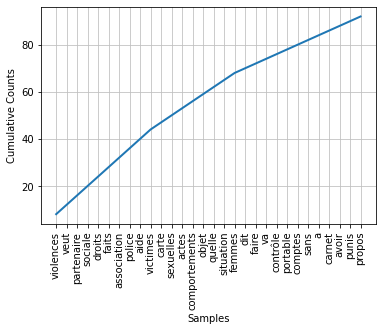

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [195]:
#La fréquence cumulée des 30 mots les plus fréquemment utilisés

fdist1.plot(30,cumulative=True)



In [196]:
#Dectection de mots les plus longs :
V = set(text3_clean)
long_words=[w for w in V if len(w) > 5]
sorted(long_words)



['accueil',
 'affectifs',
 'agressions',
 'agressé',
 'alimentation',
 'ancien',
 'anciens',
 'anxiété',
 'appelez',
 'assistant',
 'assistante',
 'association',
 'attention',
 'auteur',
 'autres',
 'avocat',
 'avocate',
 'bancaires',
 'bousculades',
 'briser',
 'brûlures',
 'capable',
 'carnet',
 'chantages',
 'chèques',
 'climat',
 'comportements',
 'compte',
 'comptes',
 'concernent',
 'concernée',
 'concubinage',
 'conduites',
 'confiance',
 'confiscation',
 'conflits',
 'conjugaux',
 'consentement',
 'conséquences',
 'contre',
 'contrôle',
 'contrôler',
 'copine',
 'couple',
 'créent',
 'culpabilité',
 'cybercontrôle',
 'cybersurveillance',
 'cyberviolence',
 'cyberviolences',
 'demande',
 'depuis',
 'différence',
 'diplôme',
 'dispositifs',
 'disposition',
 'disputes',
 'documents',
 'domination',
 'dominer',
 'droits',
 'durables',
 'dépenses',
 'dépliant',
 'dépression',
 'détruire',
 'encore',
 'entends',
 'expartenaire',
 'explications',
 'faites',
 'familiale',
 'famille',
 

In [197]:
#Les collocations sont deux ou plusieurs mots qui ont tendance à apparaître fréquemment ensembleensemble de deux mots qui
#si l'un est remplacé par l'autre, changent le sens de l'expression
text3_clean.collocations()
text3_clean.concordance('violence')
text3_clean.concordance('psychologiques')
text3_clean.concordance('faut')
text3_clean.concordance('droits')
text3_clean.concordance('risque')
text3_clean.concordance('veut')





aide victimes; anciens récents; appelez depuis; assistant social;
attention particulière; avocate avocat; cas urgence; concubinage liée;
confiance professionnelle; contre viol; dispositifs accueil;
disposition écouter; dépliant informations; faut parler; gendarmerie
mis; intervenantes sociales; liée pacs; lutte contre; mariée
concubinage; mis place
Displaying 1 of 1 matches:
ence économique quelle forme cette violence conséquences importantes nombreuse
Displaying 1 of 1 matches:
s injures menaces intimidations psychologiques humiliations chantages affectif
Displaying 2 of 2 matches:
mations droits faits anciens récents faut parler personne confiance profession
 droits pdf ko faits anciens récents faut parler personne confiance profession
Displaying 4 of 4 matches:
ents auteur veut contrôler détruire droits quelle situation mariée concubinage
e télécharger dépliant informations droits faits anciens récents faut parler p
l responsable actes violences punis droits quelle situation mariée 

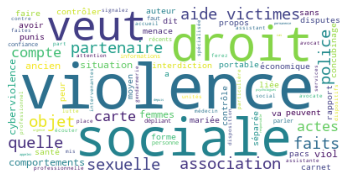

In [198]:
#Construction de nuage de pointe
# creaction d'une fonction permettant de etablir une nuage de mots : 

wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text = " ".join(token3) 
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [242]:

#Objectif: Extraire les meilleurs phrases des données textuelles
#représenter sémantiquement l'ensemble du texte (signification)
# il suit une approche non supervisée qui s'appuie sur des caractéristiques extraites du texte
#supposons que vous ayez déjà l'article dans la variable "text".
rake = Rake(stopwords=stopwords, max_length=3)
rake.extract_keywords_from_text( text_process(tx_suis))
rake_keyphrases = rake.get_ranked_phrases_with_scores()[:20]
rake_keyphrases



[(9.0, 'relations sexuelles alors'),
 (9.0, 'pacs séparée divorcée'),
 (9.0, 'pacs séparée divorcée'),
 (9.0, 'contrôle etou pirate'),
 (8.5, 'autres comptes administratifs'),
 (8.333333333333334, 'documents carte nationale'),
 (8.0, 'vie sociale familiale'),
 (8.0, 'santé diplôme etc'),
 (8.0, 'droits pdf 431'),
 (8.0, 'dit « si'),
 (8.0, 'différence entre disputes'),
 (7.8, '’ urgence appelez'),
 (7.8, '’ urgence appelez'),
 (7.555555555555555, 'violences concernent toutes'),
 (7.538461538461538, 'suisje concernée •'),
 (5.0, 'dit «'),
 (4.5, 'vie …'),
 (4.5, 'comptes bancaires'),
 (4.333333333333334, 'carte vitale'),
 (4.333333333333334, 'carte bleue')]

In [200]:
#Objectif: Extraire les meilleurs mots des données textuelles
yake = Yake(lan="fr", stopwords=stopwords)
yake_keyphrases = yake.extract_keywords(tx_suis_clean)
yake_keyphrases



[('association aide victimes', 0.00013656122246355368),
 ('accueil aide victimes', 0.00014024371165907964),
 ('aide victimes intervenantes', 0.00014024371165907964),
 ('aide victimes cas', 0.00014024371165907964),
 ('permanence association aide', 0.00016305913470795184),
 ('dispositifs accueil aide', 0.00016745957786092164),
 ('victimes cas urgence', 0.00016745957786092164),
 ('avocate avocat association', 0.0001947227253845722),
 ('avocat association spécialisée', 0.0001947227253845722),
 ('association spécialisée lutte', 0.0001947227253845722),
 ('part services police', 0.0001947227253845722),
 ('services police unités', 0.0001947227253845722),
 ('police unités gendarmerie', 0.0001947227253845722),
 ('psychologues permanence association', 0.0001947227253845722),
 ('mariée concubinage liée', 0.00019998165618643582),
 ('concubinage liée pacs', 0.00019998165618643582),
 ('récents faut parler', 0.00019998165618643582),
 ('faut parler personne', 0.00019998165618643582),
 ('parler personne

In [201]:
#Maintenant on va essayer d’attribuer une étiquette à chaque mot d’une phrase mentionnant la fonctionnalité 
#grammaticale d’un mot (Nom propre, adjectif, déterminant…)
import spacy

nlp = spacy.load("fr_core_news_sm")
doc = nlp( tx_suis_clean)
token_tag = []
for token in doc:
    token_tag.append(token.tag_)


In [65]:
#Construire des ngrammes : 
from nltk.util import ngrams
from collections import Counter
#Trouvez des bigrammes et imprimez les 10 les plus courants
bigrams = ngrams(text3_clean,2)
print("Bigrammes les plus courants : ")
print(Counter(bigrams).most_common(10))

#Trouvez des trigrammes et imprimez les 10 les plus courants
trigrams = ngrams(text3_clean,3)
print(" \n Trigrammes les plus courants : " )
print(Counter(trigrams).most_common(10))

Bigrammes les plus courants : 
[(('aide', 'victimes'), 4), (('comportements', 'partenaire'), 2), (('propos', 'comportements'), 2), (('veut', 'contrôler'), 2), (('droits', 'quelle'), 2), (('quelle', 'situation'), 2), (('situation', 'mariée'), 2), (('mariée', 'concubinage'), 2), (('concubinage', 'liée'), 2), (('liée', 'pacs'), 2)]
 
 Trigrammes les plus courants : 
[(('droits', 'quelle', 'situation'), 2), (('quelle', 'situation', 'mariée'), 2), (('situation', 'mariée', 'concubinage'), 2), (('mariée', 'concubinage', 'liée'), 2), (('concubinage', 'liée', 'pacs'), 2), (('liée', 'pacs', 'séparée'), 2), (('dépliant', 'informations', 'droits'), 2), (('faits', 'anciens', 'récents'), 2), (('anciens', 'récents', 'faut'), 2), (('récents', 'faut', 'parler'), 2)]


In [85]:
#Exemple d'analyse linguistique

token_lemma= lemmatisation(token3)
fdist_ = nltk.FreqDist([w.lower() for w in token_lemma])
modals = ['devoir', 'falloir','pouvoir']
for m in modals:
    print(m+':',fdist_[m])

devoir: 0
falloir: 2
pouvoir: 3


# Conclusion 3 : 

Ce texte a pour objectif de dire a une femme si elle est concernée par la violence ou non en se basant sur un ensemble de comportements. En effet, il présente les différents types de violences possibles (cyberviolences, cybercontrôle, cybersurveillance, économiques contrôle…) effectués par son partenaire sans se rendre compte tout en présentant les conséquences psychologiques( isolement, souffrance…) et physiques. 
Aussi, il met en valeur les droits de la femmes et les solutions les plus sécurisées pour lutter contre la violence ( extrait : faut parler a une personne de confiance ou un professionnel…) et l' inciter à défendre ses droits.

# 2-4 Analyse de texte 4 : La violence des femmes : un champ de recherche en plein essor

In [202]:
#Etape 1 : Nettoyage et Tokenization : 

token4 = Tokenization_clean( text_process(tx_Essor))
tx_Essor_clean = " ".join(token4)
text4_clean = nltk.Text(token4)


#Determination de mots les plus frequentants dans notre texte 
fdist1=FreqDist(text4_clean)
vocabulary1=fdist1.keys()
fdist1


FreqDist({'femmes': 86, 'violence': 49, 'travaux': 26, 'comme': 21, 'plus': 21, 'études': 21, 'a': 16, 'années': 15, 'cette': 14, 'histoire': 14, ...})

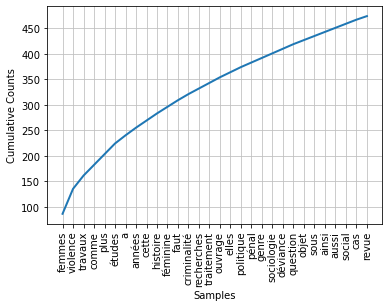

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [203]:

#La fréquence cumulée des 30 mots les plus fréquemment utilisés

fdist1.plot(30,cumulative=True)



In [204]:
#Dectection de mots les plus longs :
V = set(text4_clean)
long_words=[w for w in V if len(w) > 8]
sorted(long_words)



['académique',
 'acquittée',
 'actualisant',
 'actuellement',
 'actuelles',
 'administration',
 'adolescentes',
 'agresseurs',
 'agressives',
 'allemagne',
 'américaines',
 'analysées',
 'anarchiste',
 'anglosaxonne',
 'anglosaxons',
 'anthropologie',
 'anthropologique',
 'anthropologiques',
 'anthropologue',
 'anthropologues',
 'antiquité',
 'apprentissage',
 'approches',
 'archétype',
 'associatif',
 'attachées',
 'attention',
 'attribuée',
 'autrichienne',
 'bacchetta',
 'bagnardes',
 'bellesfilles',
 'bibliographie',
 'blanchard',
 'canadiennes',
 'canadiens',
 'cantonnement',
 'capacités',
 'capdevilla',
 'caractère',
 'certaines',
 'changements',
 'charlotte',
 'cherchent',
 'chercheure',
 'chercheuses',
 'chesneylind',
 'chevaleresque',
 'christine',
 'christophe',
 'citoyennes',
 'classique',
 'classiques',
 'clinicienne',
 'cliocapdevilla',
 'collaboration',
 'collectif',
 'collectifs',
 'collectives',
 'colloques',
 'collusion',
 'commentée',
 'commettent',
 'commettre',
 'co

In [205]:
#Les collocations sont deux ou plusieurs mots qui ont tendance à apparaître fréquemment ensembleensemble de deux mots qui
#si l'un est remplacé par l'autre, changent le sens de l'expression
text4_clean.collocations()
text4_clean.concordance('violence')
text4_clean.concordance('travaux')
text4_clean.concordance('femme')
text4_clean.concordance('criminalité')
text4_clean.concordance('politique')



violence politique; passage acte; traitement pénal; frédéric chauvaud;
réaction sociale; michelle perrot; fin années; femmes criminalisées;
faugeron rivero; ancien régime; antiquité jours; arrêt lavallee;
franceline maryportas; ouvert voie; faut mentionner; contrôle social;
violence féminine; considérées comme; caractère sexiste; extrême
gauche
Displaying 25 of 49 matches:
 violence femmes champ recherche plein essor
e cardi geneviève pruvost https si violence femmes restée longtemps ignorée co
ais presque incontournable évoquer violence féminine numéro consacré violence 
 violence féminine numéro consacré violence comme témoigne récente parution re
revue tracés consacrée description violence roussel signe vivacité recherches 
acité recherches sciences humaines violence femmes reçu plus trentaine proposi
international recherches actuelles violence femmes histoire sociologie science
 porter ensemble spectre violences violence politique violence état violence d
ectre violences violence p

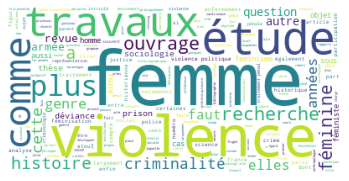

In [206]:
#Construction de nuage de pointe
# creaction d'une fonction permettant de etablir une nuage de mots : 

wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text = " ".join(token4) 
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [207]:
#Objectif: Extraire les meilleurs phrases des données textuelles
#représenter sémantiquement l'ensemble du texte (signification)
# il suit une approche non supervisée qui s'appuie sur des caractéristiques extraites du texte
#supposons que vous ayez déjà l'article dans la variable "text".
rake = Rake(stopwords=stopwords, max_length=3)
rake.extract_keywords_from_text(text_process(tx_Essor))
rake_keyphrases = rake.get_ranked_phrases_with_scores()[:20]
rake_keyphrases



[(9.0, 'événements historiquement situés'),
 (9.0, 'étudiantes affluent conduisant'),
 (9.0, 'vérifiée gora 1982'),
 (9.0, 'restée longtemps ignorée'),
 (9.0, 'psychologue clinicienne spécialiste'),
 (9.0, 'philippe robert 1973'),
 (9.0, 'myriam tsikounas dirige'),
 (9.0, 'moins souvent envoyées'),
 (9.0, 'mathématique érudit publietil'),
 (9.0, 'mafia madeo 1994'),
 (9.0, 'luc capdevilla coordonnent'),
 (9.0, 'lombroso freud thomas'),
 (9.0, 'ku klux klan'),
 (9.0, 'iii e république'),
 (9.0, 'grandes synthèses mondiales'),
 (9.0, 'gilles malandain dirigent'),
 (9.0, 'geneviève pruvost https'),
 (9.0, 'forte intégration familiale'),
 (9.0, 'formes moins visibles'),
 (9.0, 'donner quelques repères')]

In [208]:
#Objectif: Extraire les meilleurs mots des données textuelles
yake = Yake(lan="fr", stopwords=stopwords)
yake_keyphrases = yake.extract_keywords(tx_Essor_clean)
yake_keyphrases



[('participation femmes violence', 2.4276244781394684e-05),
 ('violences violence politique', 3.358758513352084e-05),
 ('violence politique violence', 3.358758513352085e-05),
 ('travaux violence femmes', 3.6289516042537706e-05),
 ('étude violence comme', 3.72344475149803e-05),
 ('violence femmes plus', 3.767071239967134e-05),
 ('femmes violence politique', 4.028009066782792e-05),
 ('recherches violence féminine', 4.185863113795554e-05),
 ('violence femmes histoire', 4.198889990142781e-05),
 ('violence politique travaux', 4.2411673969677645e-05),
 ('travaux violence politique', 4.2411673969677645e-05),
 ('passage acte femmes', 4.4105356285449106e-05),
 ('criminalité criminalisation femmes', 4.631935695938548e-05),
 ('politique violence politique', 4.707650778756943e-05),
 ('histoire recherches violence', 4.75293022062798e-05),
 ('contrôle social femmes', 4.8429239891793394e-05),
 ('violence politique histoire', 4.907410525237527e-05),
 ('violence état violence', 4.958228753343003e-05),


In [209]:
#Maintenant on va essayer d’attribuer une étiquette à chaque mot d’une phrase mentionnant la fonctionnalité 
#grammaticale d’un mot (Nom propre, adjectif, déterminant…)
import spacy

nlp = spacy.load("fr_core_news_sm")
doc = nlp(tx_Essor_clean)
token_tag = []
for token in doc:
    token_tag.append(token.tag_)
    print(token.text,token.tag_)



violence NOUN
femmes ADJ
champ ADJ
recherche NOUN
plein ADJ
essor ADJ
bibliographie NOUN
commentée VERB
coline NOUN
cardi ADJ
geneviève ADJ
pruvost NOUN
https PROPN
si SCONJ
violence NOUN
femmes NOUN
restée VERB
longtemps ADV
ignorée VERB
constitue VERB
aujourd ADV
hui ADJ
objet NOUN
recherche NOUN
pleine NOUN
recluse ADJ
bagnarde NOUN
criminelle ADJ
délinquante ADJ
hystérique ADJ
soldate NOUN
policière NOUN
révolutionnaire VERB
figures ADJ
sombres ADJ
féminin NOUN
bel VERB
bien ADV
sorties ADJ
ombre ADJ
historiographique NOUN
laquelle PRON
elles PRON
devient VERB
désormais ADV
presque ADV
incontournable ADJ
évoquer VERB
violence NOUN
féminine ADJ
numéro NOUN
consacré ADJ
violence NOUN
comme ADP
témoigne VERB
récente ADJ
parution NOUN
revue NOUN
tracés VERB
consacrée VERB
description NOUN
violence NOUN
roussel VERB
signe NOUN
vivacité NOUN
recherches ADJ
sciences NOUN
humaines ADJ
violence NOUN
femmes NOUN
reçu VERB
plus ADV
trentaine NOUN
propositions NOUN
suite NOUN
appel NOUN
commun

In [210]:
#Construire des ngrammes : 
from nltk.util import ngrams
from collections import Counter
#Trouvez des bigrammes et imprimez les 10 les plus courants
bigrams = ngrams(text4_clean,2)
print("Bigrammes les plus courants : ")
print(Counter(bigrams).most_common(10))

#Trouvez des trigrammes et imprimez les 10 les plus courants
trigrams = ngrams(text4_clean,3)
print(" \n Trigrammes les plus courants : " )
print(Counter(trigrams).most_common(10))

Bigrammes les plus courants : 
[(('violence', 'femmes'), 10), (('violence', 'politique'), 8), (('violence', 'féminine'), 6), (('traitement', 'pénal'), 5), (('participation', 'femmes'), 5), (('femmes', 'criminalisées'), 5), (('fin', 'années'), 4), (('passage', 'acte'), 4), (('violence', 'comme'), 3), (('études', 'historiques'), 3)]
 
 Trigrammes les plus courants : 
[(('sociologie', 'science', 'politique'), 2), (('a', 'joué', 'rôle'), 2), (('participation', 'femmes', 'violence'), 2), (('faut', 'également', 'citer'), 2), (('rapports', 'sociaux', 'sexe'), 2), (('passage', 'acte', 'femmes'), 2), (('criminalité', 'criminalisation', 'femmes'), 2), (('contrôle', 'social', 'femmes'), 2), (('faut', 'attendre', 'fin'), 2), (('attendre', 'fin', 'années'), 2)]


In [211]:
#Exemple d'analyse linguistique
token_lemma= lemmatisation(token4)
fdist_ = nltk.FreqDist([w.lower() for w in token_lemma])
modals = ['devoir', 'falloir','pouvoir']
for m in modals:
    print(m+':',fdist_[m])

devoir: 1
falloir: 13
pouvoir: 17


# Conclusion 4 : 

Selon les résultats de notre traitement, on constate que ce dernier présente principalement des études et des travaux qui tournent autour de la violence. Plusieurs auteurs ont été cités comme Myriam Tsikounas, Mafia Madeo, Philippe Robert, etc.  A partir de l’analyse linguistique, on observe la dominance de verbe falloir et pouvoir donc on peut dire que cet article cherche à présenter ce qui est possible dans le contexte de la violence ainsi que des idées d'obligation et de nécessité. 
Un texte qui dévoile l’histoire de la violence  à la criminalité que subissent les femmes, la violence dans le cadre de différents aspects :sociologiques, scientifiques, sociaux et politiques.


# 2-5 Analyse de texte 5 : Violences faites aux femmes : définitions, principaux chiffres et politiques publiques de lutte

In [213]:
#Etape 1 : Nettoyage et Tokenization : 

token5 = Tokenization_clean( text_process(tx_SEVE))
tx_SEVE_clean = " ".join(token5)
text5_clean = nltk.Text(token5)

#Determination de mots les plus frequentants dans notre texte 
fdist1=FreqDist(text1_clean)
vocabulary1=fdist1.keys()
fdist1



FreqDist({'femmes': 52, 'violence': 39, 'égard': 15, 'droits': 13, 'filles': 12, 'a': 9, 'tous': 8, 'plus': 8, 'journée': 7, 'internationale': 7, ...})

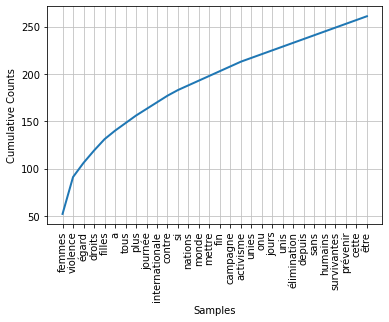

['accompagnement',
 'annuellement',
 'antérieures',
 'associations',
 'attouchements',
 'caractérisent',
 'collectivités',
 'complémentaire',
 'connaissait',
 'connaissances',
 'contraintes',
 'contrairement',
 'correspondent',
 'culpabilité',
 'difficultés',
 'différencient',
 'différentes',
 'discrimination',
 'disponibles',
 'distinguées',
 'distribution',
 'déclaration',
 'définitions',
 'délinquance',
 'dénigrement',
 'départements',
 'déploiement',
 'dépressions',
 'excompagnon',
 'expérimenté',
 'fragilisent',
 'fréquemment',
 'gouvernement',
 'gouvernementaux',
 'généralisation',
 'générations',
 'harcèlement',
 'historiquement',
 'implication',
 'inedinsermanrs',
 'interaction',
 'interministériel',
 'interministérielle',
 'intervention',
 'législation',
 'manifestations',
 'matérielles',
 'mobilisation',
 'multiformes',
 'mutilations',
 'métropolitaine',
 'nécessitent',
 'observatoire',
 'officielles',
 'orientation',
 'partenariat',
 'participent',
 'particulière',
 'princip

In [214]:
#La fréquence cumulée des 30 mots les plus fréquemment utilisés

fdist1.plot(30,cumulative=True)

#Dectection de mots les plus longs :
V = set(text5_clean)
long_words=[w for w in V if len(w) > 10]
sorted(long_words)



In [215]:
#Les collocations sont deux ou plusieurs mots qui ont tendance à apparaître fréquemment ensembleensemble de deux mots qui
#si l'un est remplacé par l'autre, changent le sens de l'expression
text5_clean.collocations()
text5_clean.concordance('violence')
text5_clean.concordance('droit')
text5_clean.concordance('femme')
text5_clean.concordance('gouvernement')
text5_clean.concordance('sensibilisation')



presses sciences; violences faites; faites femmes; lutte contre; vio
lences; tribunes santé; santé automne; prise charge; sophie simon;
plan interministériel; enquête enveff; chaque année; égalité réelle;
contre violences; automne doss; dos ier; doss ier; physiques etou; loi
égalité; réelle entre
Displaying 13 of 13 matches:
eil europe prévention lutte contre violence égard femmes violence domestique c
lutte contre violence égard femmes violence domestique convention dite istanbu
nces égard femmes comme tous actes violence fondés genre entraînent susceptibl
cond point diverses manifestations violence égard victimes ministère femmes re
tre hommes déclaration élimination violence égard femmes adoptée assemblée gén
blée générale onu décembre établit violence égard femmes traduit rapports forc
 violences faites femmes également violence société tout presses sciences po t
 psychologique plus rares cas acte violence physique sexuelle unique situation
pulation générale trouve situation violen

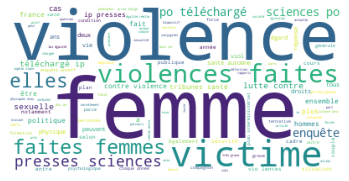

In [216]:
#Construction de nuage de pointe
# creaction d'une fonction permettant de etablir une nuage de mots : 

wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text = " ".join(token5) 
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [217]:

#Objectif: Extraire les meilleurs phrases des données textuelles
#représenter sémantiquement l'ensemble du texte (signification)
# il suit une approche non supervisée qui s'appuie sur des caractéristiques extraites du texte
#supposons que vous ayez déjà l'article dans la variable "text".
rake = Rake(stopwords=stopwords, max_length=4)
rake.extract_keywords_from_text(text_process(tx_SEVE))
rake_keyphrases = rake.get_ranked_phrases_with_scores()[:20]
rake_keyphrases



[(16.0, 'seinesaintdenis dès 2009 puis'),
 (16.0, 'riche réseau associatif engagé'),
 (16.0, 'longtemps restées cachées ignorées'),
 (16.0, 'interdite sauf accord préalable'),
 (16.0, 'idée reçue largement répandue'),
 (15.666666666666666, 'nombreux points proximité entre'),
 (15.5, 'principaux mécanismes sociaux auxquels'),
 (15.0, 'trois principaux textes récents'),
 (15.0, 'partie sous quelque forme'),
 (15.0, 'lourdes répercussions souvent tues'),
 (15.0, 'doit rester sans réponse'),
 (14.5, '4 juillet 2014 définit'),
 (14.192660550458715, '’ ondrp3 réalisent annuellement'),
 (14.0, '20 décembre 1993 établit'),
 (13.8, 'plus précoce possible notamment'),
 (13.359327217125381, '’ égalité réelle entre'),
 (13.359327217125381, '’ égalité réelle entre'),
 (13.359327217125381, '’ égalité réelle entre'),
 (13.1875, 'htm distribution électronique cairn'),
 (13.166666666666666, 'être crue contraintes matérielles')]

In [218]:
#Objectif: Extraire les meilleurs mots des données textuelles
yake = Yake(lan="fr", stopwords=stopwords)
yake_keyphrases = yake.extract_keywords(tx_SEVE_clean)
yake_keyphrases



[('violences faites femmes', 1.7841448515241037e-06),
 ('contre violences faites', 6.045984953562625e-06),
 ('lutte contre violences', 8.562607801542939e-06),
 ('tribunes santé automne', 1.8620734587958524e-05),
 ('ier femmes santé', 1.900727818169361e-05),
 ('femmes contre violences', 2.2363097768099456e-05),
 ('faites femmes dos', 2.2420273998850595e-05),
 ('automne violences faites', 2.3035200485943306e-05),
 ('violence égard femmes', 2.4218292669633775e-05),
 ('entre femmes hommes', 2.48066227288574e-05),
 ('victimes violences physiques', 2.5721085602580627e-05),
 ('sciences presses sciences', 2.7104519926387256e-05),
 ('femmes victimes violences', 2.8810188738362853e-05),
 ('faites femmes définitions', 2.8995886452418315e-05),
 ('presses sciences presses', 3.209366534734592e-05),
 ('doss ier femmes', 3.221888573693838e-05),
 ('violences violences faites', 3.348952260362897e-05),
 ('violences faites violences', 3.3489522603628975e-05),
 ('santé automne doss', 3.637262906183358e-05)

In [219]:
#Maintenant on va essayer d’attribuer une étiquette à chaque mot d’une phrase mentionnant la fonctionnalité 
#grammaticale d’un mot (Nom propre, adjectif, déterminant…)
import spacy

nlp = spacy.load("fr_core_news_sm")
doc = nlp(tx_SEVE_clean)
token_tag = []
for token in doc:
    token_tag.append(token.tag_)
    print(token.text,token.tag_)


violences NOUN
faites ADJ
femmes NOUN
définitions NOUN
principaux ADJ
chiffres NOUN
politiques ADJ
publiques ADJ
lutte VERB
sophie NOUN
simon ADJ
presses NOUN
sciences VERB
po CCONJ
tribunes NOUN
santé ADJ
pages ADJ
issn ADJ
doi DET
article NOUN
disponible ADJ
ligne NOUN
https ADJ
distribution NOUN
électronique ADJ
presses NOUN
sciences ADJ
presses NOUN
sciences NOUN
po ADV
téléchargé VERB
ip PRON
presses NOUN
sciences VERB
po CCONJ
téléchargé VERB
ip PRON
presses NOUN
sciences VERB
tous DET
droits NOUN
réservés VERB
tous DET
reproduction NOUN
représentation NOUN
cet DET
article NOUN
notamment ADV
photocopie NOUN
autorisée VERB
limites ADJ
conditions NOUN
générales ADJ
site NOUN
cas NOUN
échéant VERB
conditions NOUN
générales ADJ
licence NOUN
souscrite ADJ
toute ADJ
autre ADJ
reproduction NOUN
représentation NOUN
tout ADV
partie NOUN
sous ADP
quelque DET
forme NOUN
quelque ADV
manière NOUN
interdite VERB
sauf ADP
accord NOUN
préalable ADJ
écrit VERB
dehors ADP
cas NOUN
prévus VERB
légi

In [220]:

#Construire des ngrammes : 
from nltk.util import ngrams
from collections import Counter
#Trouvez des bigrammes et imprimez les 10 les plus courants
bigrams = ngrams(text5_clean,2)
print("Bigrammes les plus courants : ")
print(Counter(bigrams).most_common(10))

#Trouvez des trigrammes et imprimez les 10 les plus courants
trigrams = ngrams(text5_clean,3)
print(" \n Trigrammes les plus courants : " )
print(Counter(trigrams).most_common(10))

Bigrammes les plus courants : 
[(('violences', 'faites'), 23), (('faites', 'femmes'), 20), (('presses', 'sciences'), 17), (('sciences', 'po'), 15), (('po', 'téléchargé'), 14), (('téléchargé', 'ip'), 14), (('lutte', 'contre'), 12), (('contre', 'violences'), 9), (('ip', 'presses'), 8), (('tribunes', 'santé'), 7)]
 
 Trigrammes les plus courants : 
[(('violences', 'faites', 'femmes'), 18), (('presses', 'sciences', 'po'), 15), (('sciences', 'po', 'téléchargé'), 14), (('po', 'téléchargé', 'ip'), 14), (('téléchargé', 'ip', 'presses'), 8), (('ip', 'presses', 'sciences'), 8), (('lutte', 'contre', 'violences'), 6), (('tribunes', 'santé', 'automne'), 6), (('contre', 'violences', 'faites'), 5), (('ier', 'femmes', 'santé'), 4)]


In [221]:
#Exemple d'analyse linguistique

token_lemma= lemmatisation(token5)
fdist_ = nltk.FreqDist([w.lower() for w in token_lemma])
modals = ['devoir', 'falloir','pouvoir']
for m in modals:
    print(m+':',fdist_[m])

devoir: 2
falloir: 1
pouvoir: 10


# Conclusion 5 : 

En observant les resultats ci-dessus, on s'est aperçu la predominance des aspects liés a la violence (discrimination,harcèlement,violence domestique, violence physique sexuelle,violences téléphone…), un phénomène qui est resté longtemps caché et ignoré (extrait : longtemps restées cachées ignorées) ainsi que l’intervention intitatif (analyse linguistique de verbes modaux) de l’Etat cherchant (accompagnement, orientation ,collectivités, intervention, élimination, loi égalité, formation sensibilisation…)dans le but de combattre ce phénomène qui croît jour après jour dans la population française et de mettre en place une égalité réelle entre les femmes et les hommes (extrait :égalité réelle) .

# 2-6 Analyse de texte 6 : La Fédération nationale Solidarité Femmes a analysé les données du 3919 sur l'année 2021

In [222]:
#Etape 1 : Nettoyage et Tokenization : 
token6 = Tokenization_clean( text_process(tx_fem_solid))
tx_fem_solid_clean = " ".join(token6)
text6_clean = nltk.Text(token6)

#Determination de mots les plus frequentants dans notre texte 
fdist1=FreqDist(text6_clean)
vocabulary1=fdist1.keys()
fdist1



FreqDist({'violences': 11, 'femmes': 9, 'rapport': 8, 'appels': 7, 'victimes': 6, 'plus': 5, 'fédération': 4, 'solidarité': 4, 'auteurs': 4, 'aussi': 4, ...})

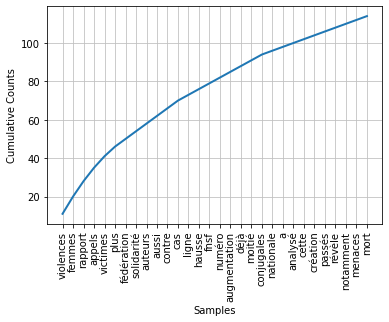

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [223]:
#La fréquence cumulée des 30 mots les plus fréquemment utilisés

fdist1.plot(30,cumulative=True)



In [224]:
#Dectection de mots les plus longs :
V = set(text6_clean)
long_words=[w for w in V if len(w) > 6]
sorted(long_words)



['administratives',
 'aggravation',
 'agresseurs',
 'alarmant',
 'analysé',
 'appelle',
 'appellent',
 'associations',
 'atteignent',
 'augmentation',
 'auteurs',
 'chiffre',
 'chiffres',
 'compris',
 'concentre',
 'concernent',
 'conclusion',
 'confinement',
 'conjoint',
 'conjugale',
 'conjugales',
 'conjugaux',
 'constate',
 'constatées',
 'continu',
 'coupables',
 'création',
 'disparités',
 'données',
 'doubler',
 'dénoncer',
 'dénoncés',
 'désormais',
 'ellesmêmes',
 'exercées',
 'explosé',
 'exprimé',
 'fournis',
 'franciliennes',
 'fédération',
 'féminicides',
 'gouvernementale',
 'habitantes',
 'important',
 'internationale',
 'journée',
 'juridictions',
 'littéralement',
 'majorité',
 'meilleure',
 'menaces',
 'mercredi',
 'mémoire',
 'nationale',
 'nationaux',
 'nombreux',
 'notamment',
 'novembre',
 'ouverte',
 'parentale',
 'particulièrement',
 'personnes',
 'physiques',
 'plaidoyer',
 'population',
 'précarisation',
 'précédente',
 'psychologiques',
 'rappellent',
 'rappo

In [225]:
#Les collocations sont deux ou plusieurs mots qui ont tendance à apparaître fréquemment ensembleensemble de deux mots qui
#si l'un est remplacé par l'autre, changent le sens de l'expression
text6_clean.collocations()
text6_clean.concordance('violence')
text6_clean.concordance('conjugale')
text6_clean.concordance('femme')
text6_clean.concordance('hausse')
text6_clean.concordance('baisse')




solidarité femmes; désormais ouverte; menaces mort; violences
conjugales; forte hausse; ligne désormais; cas dénoncés; fédération
nationale; nationale solidarité; fois plus; augmentation rapport;
rapport cas; aussi violences; victimes violences
Displaying 1 of 1 matches:
tions toute journée internationale violence femmes novembre cette fédération a
Displaying 1 of 1 matches:
 dénoncer violences hors situation conjugale également forte hausse passés part
Displaying 1 of 1 matches:
es rapportées concernent quant elles femme révèle aussi nombreux agresseurs éta
Displaying 3 of 3 matches:
ne permet signaler violences nombre hausse rapport fédération nationale solida
situation conjugale également forte hausse passés particulièrement nuit rappor
stratives violences sexuelles forte hausse représentent cas dénoncés augmentat
Displaying 1 of 1 matches:
nstate augmentation rapport chiffre baisse rapport année part où sollicitation


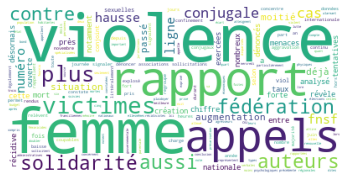

In [226]:

#Construction de nuage de pointe
# creaction d'une fonction permettant de etablir une nuage de mots : 

wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text = " ".join(token6) 
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()


In [227]:

#Objectif: Extraire les meilleurs phrases des données textuelles
#représenter sémantiquement l'ensemble du texte (signification)
# il suit une approche non supervisée qui s'appuie sur des caractéristiques extraites du texte
#supposons que vous ayez déjà l'article dans la variable "text".
rake = Rake(stopwords=stopwords, max_length=3)
rake.extract_keywords_from_text(text_process(tx_fem_solid))
rake_keyphrases = rake.get_ranked_phrases_with_scores()[:20]
rake_keyphrases



[(9.0, 'littéralement explosé durant'),
 (9.0, 'fédération appelle notamment'),
 (8.416666666666666, 'étude révèle aussi'),
 (8.416666666666666, 'étude relèvent aussi'),
 (8.25, 'fnsf attire aussi'),
 (8.0, 'ligne désormais ouverte'),
 (8.0, 'déjà rendus coupables'),
 (7.875, 'appels révèle notamment'),
 (7.875, '674 appels pris'),
 (7.666666666666666, 'emploi contre 70'),
 (7.6, 'solidarité femmes renouvelle'),
 (7.5, 'deux fois plus'),
 (7.433333333333334, 'violences conjugales constatées'),
 (7.1, 'violences dites économiques'),
 (6.766666666666666, 'violences exercées contre'),
 (4.75, 'lire aussi'),
 (4.666666666666666, 'étude rappellent'),
 (4.666666666666666, 'lutte contre'),
 (4.5, 'fnsf constate'),
 (4.433333333333334, 'violences conjugales')]

In [228]:
#Objectif: Extraire les meilleurs mots des données textuelles
yake = Yake(lan="fr", stopwords=stopwords)
yake_keyphrases = yake.extract_keywords(tx_fem_solid_clean)
yake_keyphrases



[('fédération nationale solidarité', 0.00024289014833064638),
 ('ligne désormais ouverte', 0.00027307039338297755),
 ('nationale solidarité femmes', 0.0003016943834274751),
 ('désormais ouverte continu', 0.0005470641801707567),
 ('désormais ouverte jours', 0.0005470641801707567),
 ('disparités régionales solidarité', 0.0005553776294005835),
 ('important population solidarité', 0.0005553776294005835),
 ('coupables ligne désormais', 0.0005859605475622008),
 ('rappellent ligne désormais', 0.0005859605475622008),
 ('conjugaux menaces mort', 0.0006222865356109986),
 ('menaces mort atteignent', 0.0006222865356109986),
 ('cas dénoncés augmentation', 0.0006439820470565175),
 ('conjugale également forte', 0.000645071944071276),
 ('représentent cas dénoncés', 0.000645071944071276),
 ('menaces mort tentatives', 0.0006534961535390665),
 ('viol menaces mort', 0.0006534961535390665),
 ('forte hausse représentent', 0.0006665643853052156),
 ('également forte hausse', 0.0006665643853052157),
 ('ouverte

In [229]:
#Maintenant on va essayer d’attribuer une étiquette à chaque mot d’une phrase mentionnant la fonctionnalité 
#grammaticale d’un mot (Nom propre, adjectif, déterminant…)
import spacy

nlp = spacy.load("fr_core_news_sm")
doc = nlp(tx_fem_solid_clean)
token_tag = []
for token in doc:
    token_tag.append(token.tag_)
    print(token.text,token.tag_)


fédération NOUN
nationale ADJ
solidarité NOUN
femmes NOUN
a AUX
analysé VERB
données VERB
cette DET
ligne NOUN
permet VERB
signaler VERB
violences NOUN
nombre NOUN
hausse VERB
rapport NOUN
fédération NOUN
nationale ADJ
solidarité NOUN
femmes NOUN
fnsf NOUN
création NOUN
numéro VERB
regroupe VERB
associations NOUN
toute DET
journée NOUN
internationale ADJ
violence NOUN
femmes ADJ
novembre NOUN
cette DET
fédération NOUN
a AUX
analysé VERB
appels ADJ
passés VERB
appels ADJ
pris VERB
charge NOUN
an ADJ
fnsf NOUN
constate VERB
augmentation NOUN
rapport NOUN
chiffre ADJ
baisse NOUN
rapport NOUN
année NOUN
part NOUN
où PRON
sollicitations NOUN
littéralement ADV
explosé VERB
durant ADP
confinement NOUN
appels ADJ
révèle ADJ
notamment ADV
aggravation NOUN
viols NOUN
conjugaux ADJ
menaces NOUN
mort NOUN
tentatives ADJ
auteurs NOUN
relèvent VERB
aussi ADV
fort ADV
taux NOUN
récidive ADJ
plus ADV
auteurs NOUN
violences NOUN
déjà ADV
rendus ADJ
coupables ADJ
ligne NOUN
désormais ADV
ouverte VERB
co

In [230]:

#Construire des ngrammes : 
from nltk.util import ngrams
from collections import Counter
#Trouvez des bigrammes et imprimez les 10 les plus courants
bigrams = ngrams(text6_clean,2)
print("Bigrammes les plus courants : ")
print(Counter(bigrams).most_common(10))

#Trouvez des trigrammes et imprimez les 10 les plus courants
trigrams = ngrams(text6_clean,3)
print(" \n Trigrammes les plus courants : " )
print(Counter(trigrams).most_common(10))

Bigrammes les plus courants : 
[(('solidarité', 'femmes'), 4), (('violences', 'conjugales'), 3), (('fédération', 'nationale'), 2), (('nationale', 'solidarité'), 2), (('a', 'analysé'), 2), (('augmentation', 'rapport'), 2), (('menaces', 'mort'), 2), (('ligne', 'désormais'), 2), (('désormais', 'ouverte'), 2), (('forte', 'hausse'), 2)]
 
 Trigrammes les plus courants : 
[(('fédération', 'nationale', 'solidarité'), 2), (('nationale', 'solidarité', 'femmes'), 2), (('ligne', 'désormais', 'ouverte'), 2), (('solidarité', 'femmes', 'a'), 1), (('femmes', 'a', 'analysé'), 1), (('a', 'analysé', 'données'), 1), (('analysé', 'données', 'cette'), 1), (('données', 'cette', 'ligne'), 1), (('cette', 'ligne', 'permet'), 1), (('ligne', 'permet', 'signaler'), 1)]


In [231]:
#Exemple d'analyse linguistique

token_lemma= lemmatisation(token6)
fdist_ = nltk.FreqDist([w.lower() for w in token_lemma])
modals = ['devoir', 'falloir','pouvoir']
for m in modals:
    print(m+':',fdist_[m])

devoir: 0
falloir: 0
pouvoir: 0


# Conslusion 6 : 

Ce texte est sous forme d’un ensemble de rapports sur la violence en (hors) situation conjugale (violence sexuelles, économiques, physiques…) menés par La Fédération nationale Solidarité Femmes .  Les rapports analysent cette menace en se basant sur les données nationales collectées grâce aux appels d’urgence en cas de violence et en indiquant la hausse de ce dernier au cours du temps(augmentation, forte, hausse, deux fois plus). 
En effectuant une analyse linguistique de verbes modaux, on peut dire que ce texte ne cherche pas a proposer des actes et des obligation à faire mais il recit la réalité telle qu'elle est . Une conclusion basée sur les mots les plus fréquents et les collections.

# 2-7 Analyse de texte 7 : Les mesures de protection pouvant être prises par le juge civil

In [232]:
#Etape 1 : Nettoyage et Tokenization : 

token7 = Tokenization_clean( text_process(tx_protec))
tx_protec_clean = " ".join(token7)
text7_clean = nltk.Text(token7)

#Determination de mots les plus frequentants dans notre texte 
fdist1=FreqDist(text7_clean)
vocabulary1=fdist1.keys()
fdist1



FreqDist({'protection': 6, 'juge': 6, 'victime': 6, 'domicile': 5, 'violences': 4, 'affaires': 4, 'familiales': 4, 'mesures': 3, 'personne': 3, 'couple': 3, ...})

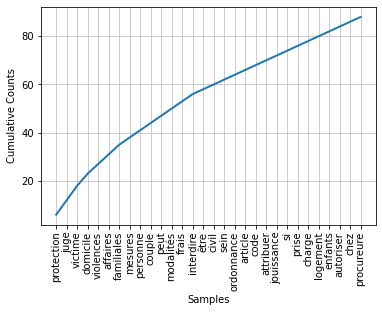

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [233]:
#La fréquence cumulée des 30 mots les plus fréquemment utilisés

fdist1.plot(30,cumulative=True)



In [234]:
#Dectection de mots les plus longs :
V = set(text7_clean)
long_words=[w for w in V if len(w) > 6]
sorted(long_words)



['accorder',
 'admettre',
 'affaires',
 'afférents',
 'alléguées',
 'article',
 'association',
 'attention',
 'attribuer',
 'autoriser',
 'besoins',
 'bracelet',
 'bénéficié',
 'celleci',
 'certains',
 'chacune',
 'circonstances',
 'civiles',
 'civilsa',
 'cliquer',
 'cohabitant',
 'compter',
 'conditionnée',
 'conjugal',
 'connaissance',
 'consentement',
 'constitue',
 'contribution',
 'courante',
 'couvrir',
 'dissimulation',
 'dissimuler',
 'domicile',
 'décisions',
 'délivrance',
 'délivrer',
 'délivrée',
 'désigné',
 'détention',
 'déterminer',
 'enfants',
 'expulser',
 'familiale',
 'familiales',
 'fixation',
 'habituellement',
 'hébergement',
 'immédiatement',
 'imposées',
 'instances',
 'interdire',
 'interdite',
 'jouissance',
 'juridictionnelle',
 'lesquelles',
 'logement',
 'mesures',
 'modalités',
 'motiver',
 'médiation',
 'nonrespect',
 'notamment',
 'ordonnance',
 'ordonner',
 'parentale',
 'parents',
 'parties',
 'personne',
 'plainte',
 'pouvant',
 'prendre',
 'procure

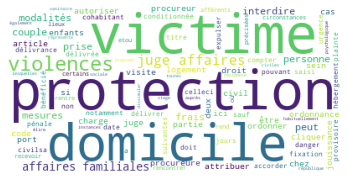

In [235]:
#Construction de nuage de pointe
# creaction d'une fonction permettant de etablir une nuage de mots : 

wordcloud = WordCloud(stopwords=stopwords, background_color="white")
text = " ".join(token7) 
wordcloud.generate(text)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()



In [236]:
#Les collocations sont deux ou plusieurs mots qui ont tendance à apparaître fréquemment ensembleensemble de deux mots qui
#si l'un est remplacé par l'autre, changent le sens de l'expression
text7_clean.collocations()
text7_clean.concordance('violence')
text7_clean.concordance('protection')
text7_clean.concordance('affaires')
text7_clean.concordance('prévention')
text7_clean.concordance('victime')


affaires familiales; juge affaires; article code; attribuer
jouissance; cliquer ici; droit visite; prise charge; procureure
procureur; sein couple; violences sein; ordonnance protection;
protection cliquer
no matches
Displaying 6 of 6 matches:
mesures protection pouvant être prises juge civil pe
 peut délivrer urgence ordonnance protection article code civilsa délivrance c
rance conditionnée plainte pénale protection doit être délivrée jours compter 
ntion nonrespect mesures imposées protection constitue délit puni deux ans plu
onstitue délit puni deux ans plus protection cliquer ici prendre connaissance 
issance modèle requête ordonnance protection cliquer ici juge affaires familia
Displaying 4 of 4 matches:
es sein couple cohabitant non juge affaires familiales saisi personne danger p
nnance protection cliquer ici juge affaires familiales devra spécialement moti
contre désigné présence tiers juge affaires familiales peut ordonner après avo
acelet électronique cas refus juge affaires 

In [237]:
#Objectif: Extraire les meilleurs phrases des données textuelles
#représenter sémantiquement l'ensemble du texte (signification)
# il suit une approche non supervisée qui s'appuie sur des caractéristiques extraites du texte
#supposons que vous ayez déjà l'article dans la variable "text".
rake = Rake(stopwords=stopwords, max_length=4)
rake.extract_keywords_from_text(text_process(tx_protec))
rake_keyphrases = rake.get_ranked_phrases_with_scores()[:20]
rake_keyphrases


[(15.0, 'si celleci a bénéficié'),
 (14.5, 'urgence sauf circonstances particulières'),
 (14.5, 'protection pouvant être prises'),
 (14.5, 'protection doit être délivrée'),
 (9.0, 'vie courante chez'),
 (9.0, 'titre provisoire notamment'),
 (9.0, 'plainte pénale préalable'),
 (9.0, 'danger peut délivrer'),
 (9.0, 'code civilsa délivrance'),
 (9.0, 'certains lieux où'),
 (9.0, 'bracelet électronique antirapprochement'),
 (9.0, '15 000 \x80.'),
 (8.5, 'protection article 5159'),
 (8.083333333333334, '\x95 admettre provisoirement'),
 (8.0, 'charge sanitaire sociale'),
 (8.0, 'affaires familiales saisi'),
 (7.666666666666667, 'juge peut accorder'),
 (7.666666666666667, 'juge civil lorsqu'),
 (7.4, 'élire domicile chez'),
 (6.25, 'victime \x95 autoriser')]

In [238]:

#Objectif: Extraire les meilleurs mots des données textuelles
yake = Yake(lan="fr", stopwords=stopwords)
yake_keyphrases = yake.extract_keywords(tx_protec_clean)
yake_keyphrases



[('juge affaires familiales', 0.00028176538753980505),
 ('protection cliquer ici', 0.0007349426108257142),
 ('violences sein couple', 0.00077554156389725),
 ('affaires familiales saisi', 0.0008175680726397732),
 ('affaires familiales devra', 0.0008175680726397732),
 ('affaires familiales avise', 0.0008175680726397732),
 ('ici juge affaires', 0.0009246465851511036),
 ('non juge affaires', 0.0009416253505240244),
 ('tiers juge affaires', 0.0009416253505240244),
 ('refus juge affaires', 0.0009416253505240244),
 ('cliquer ici prendre', 0.000953036204841249),
 ('affaires familiales peut', 0.0011203846537671718),
 ('sein couple cohabitant', 0.0011398751482103859),
 ('sein couple sexistes', 0.0011398751482103859),
 ('article code civilsa', 0.0011844137284897024),
 ('auprès procureure procureur', 0.0011844137284897024),
 ('procureure procureur république', 0.0011844137284897024),
 ('droit visite prononcer', 0.0011844137284897024),
 ('droit visite point', 0.0011844137284897024),
 ('immédiatemen

In [239]:
#Maintenant on va essayer d’attribuer une étiquette à chaque mot d’une phrase mentionnant la fonctionnalité 
#grammaticale d’un mot (Nom propre, adjectif, déterminant…)
import spacy

nlp = spacy.load("fr_core_news_sm")
doc = nlp(tx_protec_clean)
token_tag = []
for token in doc:
    token_tag.append(token.tag_)
    print(token.text,token.tag_)


mesures NOUN
protection NOUN
pouvant VERB
être AUX
prises VERB
juge ADJ
civil NOUN
personne NOUN
victime ADJ
violences NOUN
sein ADJ
couple VERB
cohabitant ADJ
non ADV
juge ADJ
affaires NOUN
familiales ADJ
saisi VERB
personne ADJ
danger VERB
peut VERB
délivrer VERB
urgence NOUN
ordonnance ADJ
protection NOUN
article NOUN
code NOUN
civilsa VERB
délivrance NOUN
conditionnée VERB
plainte NOUN
pénale ADJ
protection NOUN
doit VERB
être AUX
délivrée VERB
jours NOUN
compter VERB
fixation NOUN
date NOUN
juge ADJ
peut VERB
accorder VERB
titre NOUN
provisoire ADJ
notamment ADV
mesures NOUN
suivantes ADJ
expulser VERB
violences NOUN
domicile ADJ
couple NOUN
attribuer VERB
jouissance NOUN
victime ADJ
si SCONJ
celleci PRON
a AUX
bénéficié VERB
hébergement ADV
sauf ADP
circonstances NOUN
modalités NOUN
prise ADJ
charge NOUN
frais ADJ
afférents ADJ
logement NOUN
précisées VERB
interdire ADJ
recevoir AUX
rencontrer VERB
victime ADJ
etou ADJ
enfants NOUN
interdire ADJ
rentre VERB
certains DET
lieux ADJ

In [240]:

#Construire des ngrammes : 
from nltk.util import ngrams
from collections import Counter
#Trouvez des bigrammes et imprimez les 10 les plus courants
bigrams = ngrams(text7_clean,2)
print("Bigrammes les plus courants : ")
print(Counter(bigrams).most_common(10))

#Trouvez des trigrammes et imprimez les 10 les plus courants
trigrams = ngrams(text7_clean,3)
print(" \n Trigrammes les plus courants : " )
print(Counter(trigrams).most_common(10))

Bigrammes les plus courants : 
[(('juge', 'affaires'), 4), (('affaires', 'familiales'), 4), (('violences', 'sein'), 2), (('sein', 'couple'), 2), (('ordonnance', 'protection'), 2), (('article', 'code'), 2), (('attribuer', 'jouissance'), 2), (('prise', 'charge'), 2), (('procureure', 'procureur'), 2), (('droit', 'visite'), 2)]
 
 Trigrammes les plus courants : 
[(('juge', 'affaires', 'familiales'), 4), (('violences', 'sein', 'couple'), 2), (('protection', 'cliquer', 'ici'), 2), (('mesures', 'protection', 'pouvant'), 1), (('protection', 'pouvant', 'être'), 1), (('pouvant', 'être', 'prises'), 1), (('être', 'prises', 'juge'), 1), (('prises', 'juge', 'civil'), 1), (('juge', 'civil', 'personne'), 1), (('civil', 'personne', 'victime'), 1)]


In [241]:
#Exemple d'analyse linguistique

token_lemma= lemmatisation(token7)
fdist_ = nltk.FreqDist([w.lower() for w in token_lemma])
modals = ['devoir', 'falloir','pouvoir']
for m in modals:
    print(m+':',fdist_[m])

devoir: 2
falloir: 0
pouvoir: 4


# Conclusion 7 : 

Ce texte expose une mesure de protection judiciaire permettant au juge aux affaires familiales d’assurer la protection de victimes de violences conjugales (extrait de phrase clé : juge civil 
 peut délivrer urgence ordonnance protection pénale, responsabilisation prévention lutte contre violences sein couple…). Abordons maintenant l'analyse linguistique des verbes modaux, on relève un discours incitatif et qui oblige d’une part la victime a demandé une protection et défendre ses droits (phrases clés : victime celle ci a bénéficié hébergement, autoriser victime dissimuler domicile, charge sanitaire sociale…) et d’autre part il oblige son partenaire fautif à respecter plusieurs instructions et mesures (bracelet électronique anti rapprochement, droit visite…) dans le but de defendeur la femme contre la violence.

    

# 3)Conclusion générale  : 


Pour conclure et à la suite de l'utilisation de techniques distinctes de la NLP abordées dans ce cours, on peut reconnaître que la série de textes traités aborde le même sujet relatif aux différents formes de violences, économiques, sexuelles, physiques, psychologiques et verbales voilées, lesquelles ne cessent de s'aggraver dans la société et en particulier au sein de la population française. Ce dernier est un véritable phénomène de société touchant toutes les catégories sociales et toutes les cultures et se déroulant au cœur de la cellule familiale qui forme le noyau central de la société. 

De plus, la majorité des articles présente les interventions des nombreux acteurs sociaux par le biais des associations et des mouvements sociaux mais principalement les pouvoirs publics qui ont mis en application une législation et des lois visant à lutter contre la violence et à préserver une société meilleure pour les générations à venir.

